In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = (10, 5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def update_beta_0(y, x, beta_1, tau, mu_0, tau_0):
  N = len(y)
  precision = tau_0 + tau * N
  mean = tau_0 * mu_0 + tau * np.sum(y - beta_1 * x)
  mean /= precision
  return np.random.normal(mean, 1 / np.sqrt(precision))

In [3]:
def update_beta_1(y, x, beta_0, tau, mu_1, tau_1):
  N = len(y)
  precision = tau_1 + tau * np.sum(x * x)
  mean = tau_1 * mu_1 + tau * np.sum((y - beta_0) * x)
  mean /= precision
  return np.random.normal(mean , 1 / np.sqrt(precision))

In [4]:
def update_tau(y,x,beta_0,beta_1,alpha,beta):
  N = len(y)
  alpha_new = alpha + N / 2
  excess_beta = y - beta_0 - beta_1 * x
  beta_new = beta + (np.sum(excess_beta * excess_beta)) / 2
  return np.random.gamma(alpha_new, 1 / beta_new)

Text(0, 0.5, 'y')

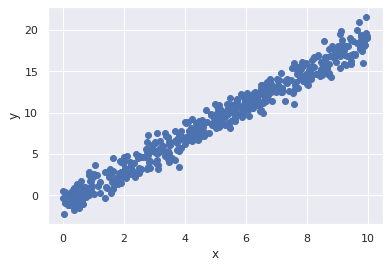

In [5]:
beta_0_true = -1
beta_1_true = 2
tau_true = 1

N = 500
x = np.random.uniform(low = 0, high = 10, size = N)
y = np.random.normal(beta_0_true + beta_1_true * x, 1 / np.sqrt(tau_true))

synth_plot = plt.plot(x, y, "o")
plt.xlabel("x")
plt.ylabel("y")

Assuming that beta_0 follows Normal(mu_0 , 1/tau_0) and beta_1 follows Normal(mu_1, 1/tau_1) and tau follows Gamma(alpha,beta)

In [6]:
## specify initial values
init = {"beta_0": 1,
        "beta_1": 0,
        "tau": 2}

## specify hyper parameters
hypers = {"mu_0": 0,
         "tau_0": 1,
         "mu_1": 0,
         "tau_1": 1,
         "alpha": 2,
         "beta": 1}

In [7]:
def gibbs(y, x, iters, init, hypers):
    assert len(y) == len(x)
    beta_0 = init["beta_0"]
    beta_1 = init["beta_1"]
    tau = init["tau"]
    
    trace = np.zeros((iters, 3)) ## trace to store values of beta_0, beta_1, tau
    
    for it in range(iters):
        beta_0 = update_beta_0(y, x, beta_1, tau, hypers["mu_0"], hypers["tau_0"])
        beta_1 = update_beta_1(y, x, beta_0, tau, hypers["mu_1"], hypers["tau_1"])
        tau = update_tau(y, x, beta_0, beta_1, hypers["alpha"], hypers["beta"])
        trace[it,:] = np.array((beta_0, beta_1, tau))
        
    trace = pd.DataFrame(trace)
    trace.columns = ['beta_0', 'beta_1', 'tau']
        
    return trace

In [8]:
iters = 1000
trace = gibbs(y, x, iters, init, hypers)[:500]

Text(0, 0.5, 'Parameter value')

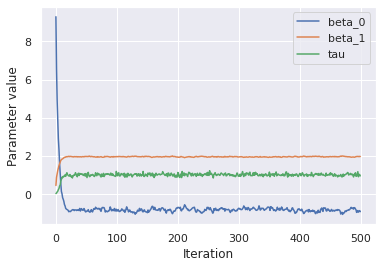

In [9]:
traceplot = trace.plot()
traceplot.set_xlabel("Iteration")
traceplot.set_ylabel("Parameter value")